# More Gender Linguistics: "Assertive"

It's hard to be an assertive woman without being called "bossy." Take Supreme Court Justice Elena Kagan. [This podcast](https://www.wnycstudios.org/podcasts/radiolabmoreperfect/episodes/justice-interrupted) describes how she speaks up about as much as the average male justice, but she gets a lot of flack for being bossy and overly strident. 

Furthermore, a bossy woman is a short step away from being called "bitchy." 

I used a machine learning model trained on 100 billion words from Google News archives to investigate the way gender impacts the meaning of "assertive" and related words.

## Word Algebra

As discussed yesterday, machine learning allows you to, loosely speaking, do math with words. You can have an equation like: King - Man + Woman = Queen. This is an analogy. "Man is to King as Woman is to...?" Queen. 

When you have the model make analogies with words that are tied to gender based on usage rather than dictionary definitions, you can get insight into implicit biases in our language and culture. For example, when prompted to finish the analogy "Man is to dishwasher as woman is to..." the model comes up with "washing machine." This reflects the way chores are balanced in many households, despite the words being irrelevant to gender by definition.

## Adding "femininity" and "masculinity" to a word

By making the analogy "man:word :: woman:\_\_", you can get a word similar in meaning to the input word, but used more often in the context of women. Similarly, with "woman:word :: man:\_\_," you will get a "more masculine" version of the input word.

Rather than "man" and "woman" I use the gendered pronouns "he" and "she," because they are more common, and because "man" has other meanings (as in "oh man!" or "mankind").

I use the python liberary `gensim`.

In [ ]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[=================================================-] 99.8% 1660.1/1662.8MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
def analogy(w1a, w1b, w2a):
	result = wv.most_similar(negative=[w1a], 
                                positive=[w1b, w2a])
	if result[0][0].lower() == w1b:
		return result[1][0]
	return result[0][0]

I defined fuctions `feminize` and `masculinize` which will return the model's response to "he:word :: she:\_\_" and "she:word :: he:\_\_," respectively.

In [ ]:
def feminize(word):
  return analogy("he", word, "she")

def masculinize(word):
  return analogy("she", word, "he")

Then, I fed in the word "assertive" to both functions.

In [ ]:
def print_feminized(word):
  result = feminize(word)
  print("\"He\" is to \"%s\" as \"she\" is to \"%s\"" % (word, result))
  return result

def print_masculinized(word):
  result = masculinize(word)
  print("\"She\" is to \"%s\" as \"he\" is to \"%s\"" % (word, result))
  return result

In [ ]:
_ = print_feminized("assertive")
_ = print_masculinized("assertive")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


"He" is to "assertive" as "she" is to "bossy"
"She" is to "assertive" as "he" is to "forceful"


Next, I built up a graph of word relationships stemming from "assertive." In the graph, each pink arrow is the result of the `feminize` function, while each blue arrow is the result of the `masculinize` function. 

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


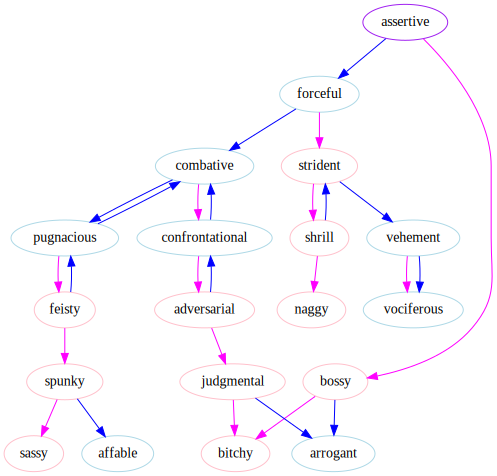

In [ ]:
from graphviz import Digraph

g = Digraph()

words = set(["assertive", "adversarial", "strident", "combative", "feisty"])
g.node("assertive", color="purple")

used_words = set()

def iterate(words):
  results = set()
  for word in words:
    f = feminize(word)
    m = masculinize(word)
    g.node(f, color="pink")
    g.node(m, color="lightblue")
    results.add(f)
    results.add(m)
    g.edge(word, f, color="magenta")
    g.edge(word, m, color="blue")
  used_words.add(word)
  return results

results_1 = iterate(words)
results_2 = iterate(results_1)

g

## Discussion

The "assertive" -> "bossy" -> "bitchy" relation is interesting to me because it definitely seems to be reflect popular stereotypes. It's also interesting that the graph loops back around to "bitchy" from another direction. The masculine "forceful" -> "combative" becomes "confrontational," then "adverserial," then "judgemental," then again "bitchy" when the `feminize` function is applied.

I also find the "forceful" -> "strident" -> "shrill" -> "naggy" path to be noteworty. "Shrill" and "naggy" are belittling, and embody a lack of respect, where their more masculine predecessor, "forceful," depicts control and respectability.

The conclusion seems to be that, when we use words related to self-assertion in regards to women, they quickly take on negative and insulting meanings.